<b>Segmentation is the process of dividing customer into differnt groups based on their characteristics for effictive marketing purposes.</b>

<b>RFM (recency, frequency, monetary) analysis is a marketing technique used to understand customer by examining how recently a customer has purchased (recency), how often they purchase (frequency), and how much the customer spends (monetary)</b>


In [1]:
# importing libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import timedelta
from scipy import stats

In [2]:
#Loading the data
data_df=pd.read_csv('sales_data_sample.csv',encoding = 'unicode_escape',parse_dates=['ORDERDATE'])
pd.set_option('max_columns',30)
#pd.set_option('max_row', 3000)

In [3]:
data_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
data_df.shape

(2823, 25)

In [5]:
print('-----------NULL VALUES--------------')
data_df.isnull().sum()

-----------NULL VALUES--------------


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [6]:
print('-----------UNIQUE VALUES--------------')
data_df.nunique()

-----------UNIQUE VALUES--------------


ORDERNUMBER          307
QUANTITYORDERED       58
PRICEEACH           1016
ORDERLINENUMBER       18
SALES               2763
ORDERDATE            252
STATUS                 6
QTR_ID                 4
MONTH_ID              12
YEAR_ID                3
PRODUCTLINE            7
MSRP                  80
PRODUCTCODE          109
CUSTOMERNAME          92
PHONE                 91
ADDRESSLINE1          92
ADDRESSLINE2           9
CITY                  73
STATE                 16
POSTALCODE            73
COUNTRY               19
TERRITORY              3
CONTACTLASTNAME       77
CONTACTFIRSTNAME      72
DEALSIZE               3
dtype: int64

<b>UNIQUE CUSTOMER: 92</b>

In [7]:
# fig, ax = plt.subplots(figsize=(11,5))   
# sns.heatmap(data_df.isnull(),yticklabels=False,cmap='viridis',ax=ax)

In [8]:
#droping unnecessary  columns
data_df.drop(['ADDRESSLINE1','ADDRESSLINE2','PHONE','POSTALCODE'],axis=1,inplace=True)

In [9]:
#For some of the rows PRICEEACH was mislabelled as 100(ie: PRICEEACH*QUANTITYORDERED != SALES)
data_df['PRICEEACH']=(data_df['SALES']/data_df['QUANTITYORDERED'])

In [10]:
data_df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,112.22,15,2244.40,2004-12-02,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,Madrid,NaN,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,137.19,1,3978.51,2005-01-31,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Oulu,NaN,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,125.99,4,5417.57,2005-03-01,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,Madrid,NaN,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,Toulouse,NaN,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,2005-05-06,On Hold,2,5,2005,Ships,54,S72_3212,Gifts4AllAges.com,Boston,MA,USA,NaN,Yoshido,Juri,Medium


# Distribution of Numerical variables

/home/sunnel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


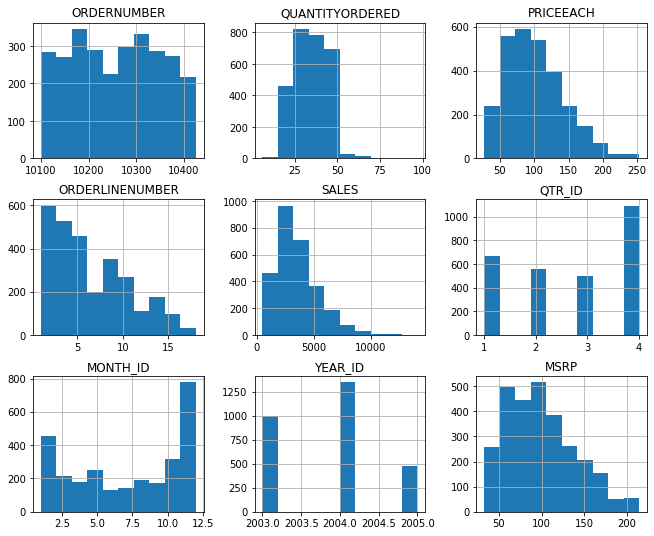

In [11]:
fg,ax=plt.subplots(figsize=(11,9))
data_df.hist(ax=ax)
plt.show()

In [12]:
data_df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,101.159440,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,42.155561,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,127.100000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


# Correlation analysis

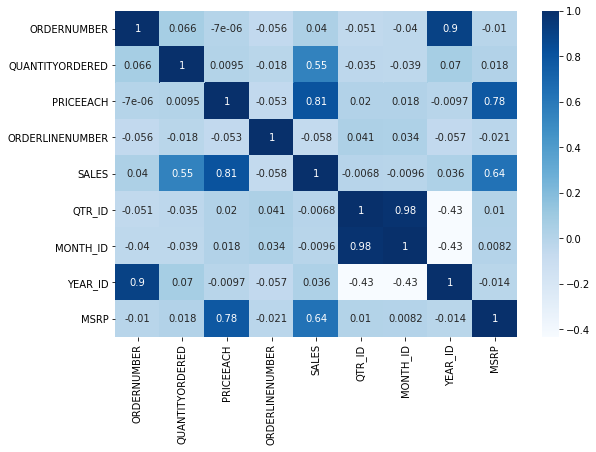

In [13]:
fig, ax = plt.subplots(figsize=(9,6))   
sns.heatmap(data_df.corr(),cmap='Blues',annot=True,ax=ax)

# MSRP(manufacturer\'s suggested retail price) vs PriceEach

Text(0.5, 1.0, "MSRP(manufacturer's suggested retail price) vs PriceEach")

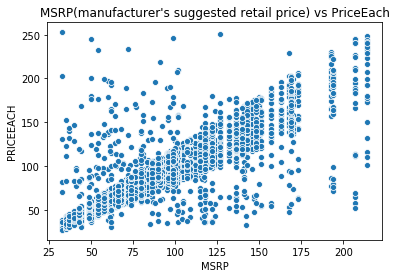

In [14]:
ax=sns.scatterplot(data_df['MSRP'],data_df['PRICEEACH'])
ax.set_title('MSRP(manufacturer\'s suggested retail price) vs PriceEach')

# QUANTITY ORDERED vs SALES

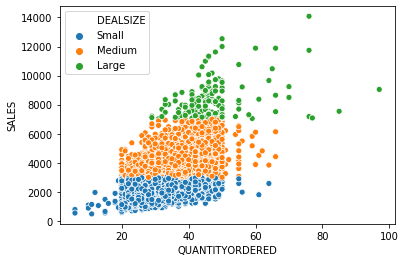

In [15]:
sns.scatterplot(data_df['QUANTITYORDERED'],data_df['SALES'],hue=data_df['DEALSIZE'])

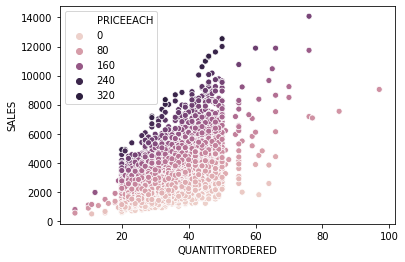

In [16]:
sns.scatterplot(data_df['QUANTITYORDERED'],data_df['SALES'],hue=data_df['PRICEEACH'])

# SALES in Different Years

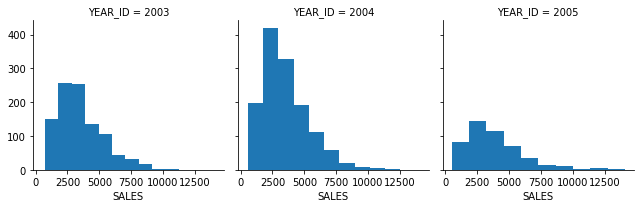

In [17]:
fg=sns.FacetGrid(data_df,col='YEAR_ID')
fg.map(plt.hist,'SALES')

In [18]:
#State is only given For these COUNTRY. For all other country it is null!
(data_df[data_df['STATE'].notnull()])['COUNTRY'].unique()

array(['USA', 'Australia', 'Canada', 'Japan', 'UK'], dtype=object)

# Top 10 countries by Sales

Text(0.5, 1.0, 'Top 10 countries by Sales')

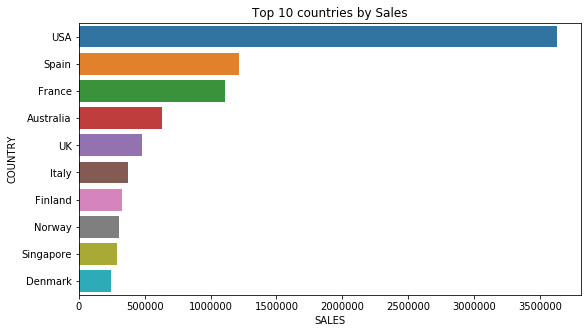

In [19]:
top_sales=data_df.groupby('COUNTRY').sum().sort_values(by='SALES',ascending=False).head(10)[['SALES']]
fig,ax=plt.subplots(figsize=(9,5))
sns.barplot(top_sales['SALES'],top_sales.index,ax=ax)
plt.title('Top 10 countries by Sales')

# Value Counts of categorical Variables

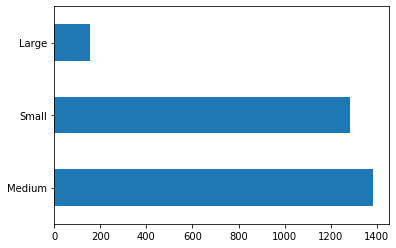

In [20]:
data_df['DEALSIZE'].value_counts().plot(kind='barh')

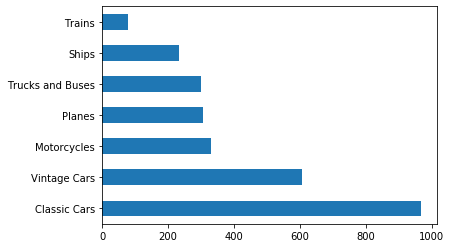

In [21]:
data_df['PRODUCTLINE'].value_counts().plot(kind='barh')

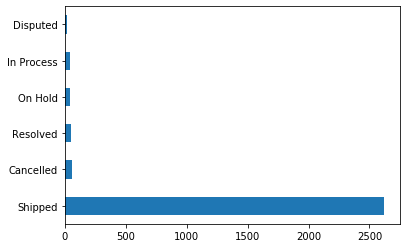

In [22]:
data_df['STATUS'].value_counts().plot(kind='barh')

TERRITORY<BR>
APAC : Asia Pacific<BR>
EMEA : Europe, the Middle East and Africa<BR>

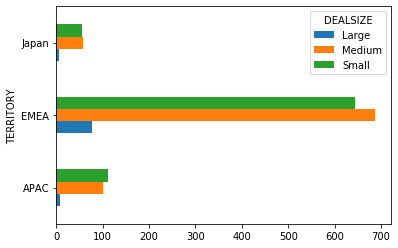

In [23]:
pd.crosstab(data_df['TERRITORY'],data_df['DEALSIZE']).plot(kind='barh')

# Mothly Reveue in Dfferent Years

Text(0.5, 1.0, 'Mothly Reveue')

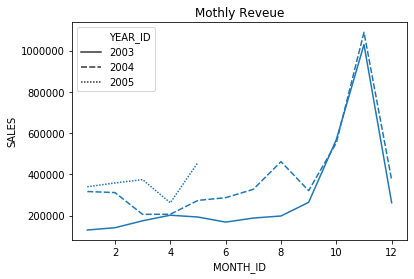

In [24]:
mothly_reveue=data_df.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()
sns.lineplot(x='MONTH_ID',y='SALES',style='YEAR_ID',data=mothly_reveue)
plt.title('Mothly Reveue')

<b>This clearly shows that the revenue is more especially in October and November. </b>

In [25]:
rfm_df=data_df.groupby('CUSTOMERNAME').agg({'ORDERDATE':'max','CUSTOMERNAME':'count','SALES':'sum'})

In [26]:
last_date=(data_df['ORDERDATE'].max()+timedelta(days=1))
rfm_df['Recency']=(last_date-rfm_df['ORDERDATE']).dt.days
rfm_df.head()

,ORDERDATE,CUSTOMERNAME,SALES,Recency
CUSTOMERNAME,,,,
"AV Stores, Co.",2004-11-17,51,157807.81,196
Alpha Cognac,2005-03-28,20,70488.44,65
Amica Models & Co.,2004-09-09,26,94117.26,265
"Anna's Decorations, Ltd",2005-03-09,46,153996.13,84
Atelier graphique,2004-11-25,7,24179.96,188


In [27]:
rfm_df.rename(columns={'CUSTOMERNAME':'Frequency','SALES':'Monetry value'},inplace=True)
rfm_df.drop('ORDERDATE',axis=1,inplace=True)
# rfm_df=rfm_df.reset_index()

/home/sunnel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


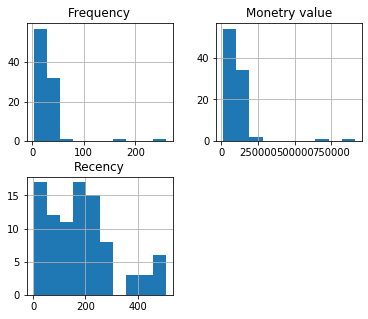

In [28]:
fig,ax=plt.subplots(figsize=(6,5))
rfm_df.hist(ax=ax)
plt.show()

# Q-Q Plot to check if data is normally distributed or not!

In [29]:
from scipy import stats
def q_qplot(col,df):
    fig,ax=plt.subplots()
    stats.probplot(df[col],dist="norm",plot=ax)
    ax.set_title(f'Q-Q plot({col})')
    plt.show()

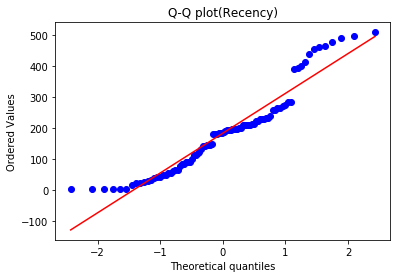

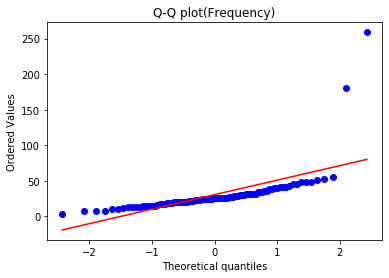

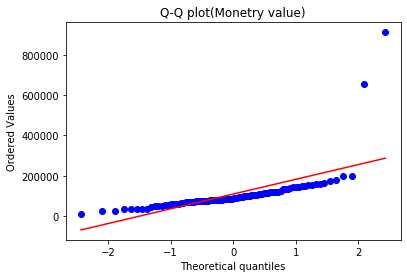

In [30]:
q_qplot('Recency',rfm_df)
q_qplot('Frequency',rfm_df)
q_qplot('Monetry value',rfm_df)

# Log Transformation to reduce swekness in data

In [31]:
rfm_log=np.log(rfm_df)

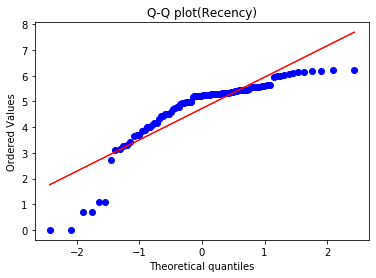

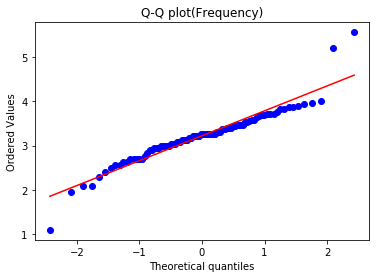

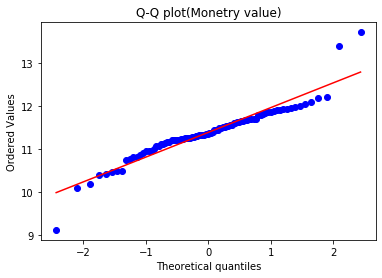

In [32]:
q_qplot('Recency',rfm_log)
q_qplot('Frequency',rfm_log)
q_qplot('Monetry value',rfm_log)

/home/sunnel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


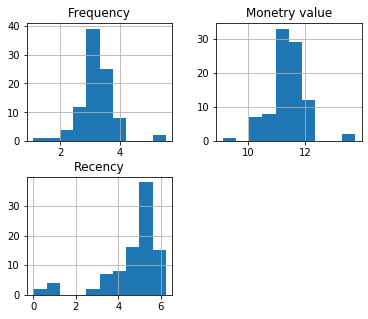

In [33]:
fig,ax=plt.subplots(figsize=(6,5))
rfm_log.hist(ax=ax)
plt.show()

# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rfm_standarized=scaler.fit_transform(rfm_log)

# Choosing the Value of Number of Cluster

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

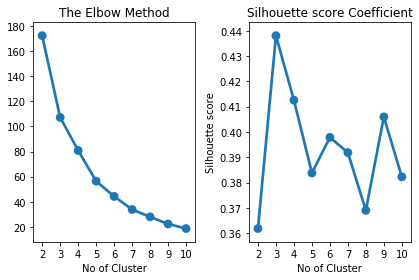

In [36]:
# Fit KMeans and calculate sse,Silhouette_score for each k
sse={}
Silhouette_score={}
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
    kmeans.fit(rfm_standarized)
    sse[k]=kmeans.inertia_
    
    labels=kmeans.labels_
    Silhouette_score[k]=silhouette_score(rfm_standarized,labels)
    
fig,(ax1,ax2)=plt.subplots(1,2)
#Plot For The Elbow Method
sns.pointplot(list(sse.keys()),list(sse.values()),ax=ax1)
ax1.set_xlabel('No of Cluster')
ax1.set_title('The Elbow Method')

#Plot For The Silhouette Coefficient 
sns.pointplot(list(Silhouette_score.keys()),list(Silhouette_score.values()),ax=ax2)
ax2.set_title('Silhouette score Coefficient')
ax2.set_xlabel('No of Cluster')
ax2.set_ylabel('Silhouette score')
fig.tight_layout()

# KMeans with 5 clusters

In [37]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
kmeans.fit(rfm_standarized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [38]:
#Assigning value of cluster in original dataframe
labels=kmeans.labels_
rfm_df=rfm_df.assign(Cluster=labels)

In [39]:
#Average value of rfm for each cluster
cluster_summary=rfm_df.groupby(by=['Cluster']).agg({'Recency':'mean',
                                    'Frequency':'mean',
                                    'Monetry value':'mean',
                                    'Cluster':'count'}).rename(columns={'Cluster':'count'})
cluster_summary

,Recency,Frequency,Monetry value,count
Cluster,,,,
0,128.967742,36.677419,131516.888710,31
1,324.250000,10.666667,35628.653333,12
2,2.000000,219.500000,783576.085000,2
3,4.600000,39.000000,135721.034000,5
4,212.000000,22.000000,78150.098095,42


<b>Cluster 0=For some time they haven't transacted and had average frequency.<br>
Cluster 1=It’s been a long time they haven't transacted and used to transact less.<br>
Cluster 2=They transacted recently, do so often and spend more than other customers.<br>
Cluster 3=They transacted recently,and have average frequency.<br>
Cluster 4=It’s been a long time they haven't transacted but had average frequency.<br></b>

# Snake Plot

In [40]:
#All the cloumns in rfm_log_nrm are in same scale so applying snake plot in it by adding cluster Value

rfm_standarized=pd.DataFrame(rfm_standarized,columns=['Frequency','Monetry value','Recency'])
rfm_standarized['Cluster']=rfm_df['Cluster'].values

# Melting the data  so RFM values and metric names are stored in 1 column each
rfm_melted=pd.melt(rfm_standarized,id_vars=['Cluster'],
        value_vars=['Recency','Monetry value','Frequency'],
        var_name='metrics',
        value_name='Value')

Text(0.5, 1.0, 'Snake Plot')

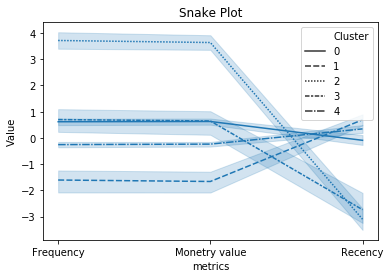

In [43]:
sns.lineplot(x='metrics',y='Value',style='Cluster',data=rfm_melted)
plt.title('Snake Plot')

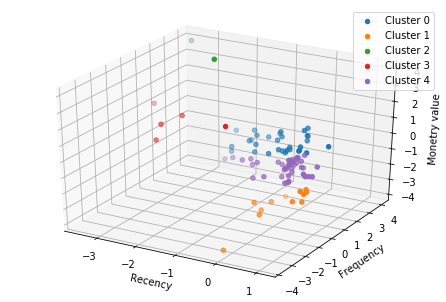

In [44]:
# %matplotlib notebook    #to make plot interactive
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
for x in range(5):
    ax.scatter(rfm_standarized.loc[ rfm_standarized['Cluster']==x]['Recency'],
               rfm_standarized.loc[ rfm_standarized['Cluster']==x]['Frequency'],
               rfm_standarized.loc[ rfm_standarized['Cluster']==x]['Monetry value'],
               label=f'Cluster {x}')
    ax.legend()
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetry value')
plt.show()